# Top
# Mapbox API

In [1]:
import os 
import mapbox
from shapely.geometry import LineString, Point

**I should rename my environment variable to `MAPBOX_ACCESS_TOKEN` then I think it will load automagically...maybe.**

In [2]:
key = 'pk.eyJ1IjoiZGF0YXNsZXV0aCIsImEiOiJjazB0em1tbGUwaXdnM21yenJjdTJybm52In0.qm4lOhweUJZuaxgEl6lEwA'

# Directions API
Look [here](https://github.com/mapbox/mapbox-sdk-py/blob/master/docs/directions.md#directions) now.

In [3]:
directions = mapbox.Directions()
directions.session.params['access_token'] = key

For the directions API you need the `geometry` key to be filled out but not the properties key. So to get a full "search for this place name and give me directions" I'll need to also use the geolocating sdk.

In [4]:
origin = {
    'type': 'Feature',
    'properties': {'name': 'Portland, OR'},
    'geometry': {
        'type': 'Point',
        'coordinates': [-122.7282, 45.5801]
    }
}

destination = {
    'type': 'Feature',
    'geometry': {
        'type': 'Point',
        'coordinates': [-121.3153, 44.0582]
    }
}

In [5]:
response = directions.directions([origin, destination], 'mapbox/driving')

In [6]:
response.status_code

200

In [7]:
response.headers

{'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '662', 'Connection': 'keep-alive', 'Date': 'Fri, 27 Sep 2019 09:51:42 GMT', 'Access-Control-Allow-Origin': '*', 'x-mapbox-request-id': 'lNh40VqQPkKNwYpCt5RqZvlDN_T9vQBc-JNPLO-Uwg6oMU2XAbij_A==', 'Cache-Control': 'private, no-cache, no-store, must-revalidate', 'Expires': '-1', 'Pragma': 'no-cache', 'X-Rate-Limit-Limit': '300', 'X-Rate-Limit-Interval': '60', 'X-Rate-Limit-Reset': '1569577962', 'X-Rate-Limit-Remaining': '299', 'Vary': 'Accept-Encoding', 'X-Cache': 'Miss from cloudfront', 'Via': '1.1 2e20768704c71ff3ce2e677251d27f3c.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'SEA19-C1', 'X-Amz-Cf-Id': '5Dq3_I9iUexoNo_N31qfnwbPEd_7uCnNmT0MAAIShjtjzt_ECWIVzw=='}

In [8]:
response.geojson()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [(-122.72833, 45.57993),
     (-122.72798, 45.5798),
     (-122.72771, 45.58016),
     (-122.72621, 45.57961),
     (-122.72406, 45.58247),
     (-122.56561, 45.5615),
     (-122.56663, 45.55831),
     (-122.56411, 45.55143),
     (-122.54908, 45.5474),
     (-122.42422, 45.54006),
     (-122.41838, 45.53942),
     (-122.41303, 45.5297),
     (-122.41327, 45.52431),
     (-122.41395, 45.5017),
     (-122.40648, 45.49445),
     (-122.40572, 45.4937),
     (-122.4049, 45.49284),
     (-122.33745, 45.42852),
     (-122.22181, 45.37589),
     (-122.04749, 45.37969),
     (-121.8712, 45.30526),
     (-121.73456, 45.30039),
     (-121.66229, 45.15901),
     (-121.55877, 45.1071),
     (-121.51365, 45.05603),
     (-121.42422, 44.86716),
     (-121.32095, 44.78582),
     (-121.22736, 44.76025),
     (-121.23871, 44.73099),
     (-121.17692, 44.72112),
     (-121.1297, 44.63

# Geolocation API
[Check it out](https://github.com/mapbox/mapbox-sdk-py/blob/master/docs/geocoding.md#geocoding) (not with Steve Brule).

In [9]:
geocoder = mapbox.Geocoder()
geocoder.session.params['access_token'] = key

In [10]:
response = geocoder.forward('Chester, NJ')

In [11]:
response

<Response [200]>

In [12]:
collection = response.json()

In [13]:
collection

{'type': 'FeatureCollection',
 'query': ['chester', 'nj'],
 'features': [{'id': 'place.19265010375375880',
   'type': 'Feature',
   'place_type': ['place'],
   'relevance': 1,
   'properties': {'wikidata': 'Q3014459'},
   'text': 'Chester',
   'place_name': 'Chester, New Jersey, United States',
   'bbox': [-74.7406370098727,
    40.7194501349244,
    -74.6237060993922,
    40.8336099261131],
   'center': [-74.6968, 40.7843],
   'geometry': {'type': 'Point', 'coordinates': [-74.6968, 40.7843]},
   'context': [{'id': 'region.14919479731700330',
     'short_code': 'US-NJ',
     'wikidata': 'Q1408',
     'text': 'New Jersey'},
    {'id': 'country.9053006287256050',
     'short_code': 'us',
     'wikidata': 'Q30',
     'text': 'United States'}]},
  {'id': 'poi.2181843390229',
   'type': 'Feature',
   'place_type': ['poi'],
   'relevance': 0.88,
   'properties': {'landmark': True,
    'category': 'hotel, motel, tourism, lodging'},
   'text': 'Chester Hotel',
   'place_name': 'Chester Hotel, 

# Combining Geolocation and Directions
**ToDo:**
- Restrict the number of search results returned or restrict to a bounding box of VT only

In [14]:
startname = 'Middlebury, CT'
endname = 'Randolph, CT'

In [15]:
key = 'pk.eyJ1IjoiZGF0YXNsZXV0aCIsImEiOiJjazB0em1tbGUwaXdnM21yenJjdTJybm52In0.qm4lOhweUJZuaxgEl6lEwA'
geocoder = mapbox.Geocoder()
geocoder.session.params['access_token'] = key
directions = mapbox.Directions()
directions.session.params['access_token'] = key

startresponse = geocoder.forward(startname)
endresponse = geocoder.forward(endname)
origin = startresponse.geojson()['features'][0]
destination = endresponse.geojson()['features'][0]
response = directions.directions([origin, destination], 'mapbox/driving')

In [25]:
response.json()

{'routes': [{'weight_name': 'routability',
   'legs': [{'summary': 'I 84 East, I 91 North',
     'steps': [],
     'distance': 339813.8,
     'duration': 12103,
     'weight': 12103}],
   'geometry': 'k{m|F~vi}L\\oAi@lKcmAcyGuPgy@rAclXkuWc{TwcIuxF_tHcoUeZ{y@{gSsf@_rGi`IkjN_~CsuPwN}mKj{KsdV}jG}~LndFgmm@u_Cg~QutNa|GtpDa{Y``AcpI}fI{jGdEg|FgyJ{oQayA_pI|aCuo]gfIgzh@ovA}iJe`DusBemFeiGoe@dCuAemFjwJ_zSrxHkB|dGcfFtoF`~@diEoiCdrDyxSlhEiYaJ|WomA',
   'distance': 339813.8,
   'duration': 12103,
   'weight': 12103}],
 'waypoints': [{'distance': 18.731,
   'name': 'Middlebury Store Road',
   'location': [-73.12767, 41.52774]},
  {'distance': 6.429, 'name': 'VT 66', 'location': [-72.607628, 43.940845]}],
 'code': 'Ok',
 'uuid': 'cr1zIopHMxPeZ7_AxMn0a_iD1__VVICPkxAmCCY_pvysqKeyyRkUcg=='}

In [20]:
test_route = LineString(coords)

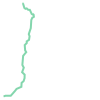

In [21]:
test_route

In [22]:
test_route.length

3.1170872202790854

In [27]:
test_route.length / (21.1150506*2)

0.07381197609536122

In [18]:
coords = response.geojson()['features'][0]['geometry']['coordinates']
'['+','.join(["[{},{}]".format(lat, lon) for lat, lon in coords])+']'
coords

[(-73.12768, 41.52774),
 (-73.12728, 41.52759),
 (-73.12927, 41.5278),
 (-73.08413, 41.5403),
 (-73.07481, 41.54313),
 (-72.94471, 41.54271),
 (-72.83269, 41.66917),
 (-72.79274, 41.72113),
 (-72.67752, 41.77057),
 (-72.6681, 41.77492),
 (-72.66176, 41.87874),
 (-72.61035, 41.92274),
 (-72.58491, 42.00136),
 (-72.58239, 42.09202),
 (-72.64837, 42.15585),
 (-72.6055, 42.27451),
 (-72.64222, 42.34618),
 (-72.62163, 42.58398),
 (-72.54136, 42.68114),
 (-72.56979, 42.72675),
 (-72.5802, 42.86436),
 (-72.52773, 42.9183),
 (-72.52872, 42.96116),
 (-72.4682, 43.00168),
 (-72.45379, 43.09654),
 (-72.47474, 43.15046),
 (-72.42238, 43.30673),
 (-72.40838, 43.52101),
 (-72.38259, 43.57908),
 (-72.34448, 43.59775),
 (-72.33832, 43.64034),
 (-72.33789, 43.63967),
 (-72.39811, 43.67778),
 (-72.44829, 43.7845),
 (-72.4902, 43.78504),
 (-72.52871, 43.82202),
 (-72.56106, 43.81193),
 (-72.58973, 43.83409),
 (-72.62196, 43.94062),
 (-72.62019, 43.94483),
 (-72.60763, 43.94084)]

In [16]:
coords = response.geojson()['features'][0]['geometry']['coordinates']
'['+','.join(["[{},{}]".format(lat, lon) for lat, lon in coords])+']'

'[[-73.12768,41.52774],[-73.12728,41.52759],[-73.12927,41.5278],[-73.08413,41.5403],[-73.07481,41.54313],[-72.94471,41.54271],[-72.83269,41.66917],[-72.79274,41.72113],[-72.67752,41.77057],[-72.6681,41.77492],[-72.66176,41.87874],[-72.61035,41.92274],[-72.58491,42.00136],[-72.58239,42.09202],[-72.64837,42.15585],[-72.6055,42.27451],[-72.64222,42.34618],[-72.62163,42.58398],[-72.54136,42.68114],[-72.56979,42.72675],[-72.5802,42.86436],[-72.52773,42.9183],[-72.52872,42.96116],[-72.4682,43.00168],[-72.45379,43.09654],[-72.47474,43.15046],[-72.42238,43.30673],[-72.40838,43.52101],[-72.38259,43.57908],[-72.34448,43.59775],[-72.33832,43.64034],[-72.33789,43.63967],[-72.39811,43.67778],[-72.44829,43.7845],[-72.4902,43.78504],[-72.52871,43.82202],[-72.56106,43.81193],[-72.58973,43.83409],[-72.62196,43.94062],[-72.62019,43.94483],[-72.60763,43.94084]]'

In [57]:
response.geojson()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [(-73.12768, 41.52774),
     (-73.12728, 41.52759),
     (-73.12927, 41.5278),
     (-73.08413, 41.5403),
     (-73.07481, 41.54313),
     (-72.94471, 41.54271),
     (-72.83269, 41.66917),
     (-72.79274, 41.72113),
     (-72.67752, 41.77057),
     (-72.6681, 41.77492),
     (-72.66176, 41.87874),
     (-72.61035, 41.92274),
     (-72.58491, 42.00136),
     (-72.58239, 42.09202),
     (-72.64837, 42.15585),
     (-72.6055, 42.27451),
     (-72.64222, 42.34618),
     (-72.62163, 42.58398),
     (-72.54136, 42.68114),
     (-72.56979, 42.72675),
     (-72.5802, 42.86436),
     (-72.52773, 42.9183),
     (-72.52872, 42.96116),
     (-72.4682, 43.00168),
     (-72.45379, 43.09654),
     (-72.47474, 43.15046),
     (-72.42238, 43.30673),
     (-72.40838, 43.52101),
     (-72.38259, 43.57908),
     (-72.34448, 43.59775),
     (-72.33832, 43.64034),
     (-72.33789, 43.63